# 作業一

In [59]:
!pip install yfinance

In [60]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [61]:
# 輸入股票代號

stock_id = "2888.TW"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
#end = dt.date.today()
# output : 2024-09-30
end = dt.date(2024, 1, 16)
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=350)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

df

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,2888.TW,2888.TW,2888.TW,2888.TW,2888.TW,2888.TW
0,2023-01-31 00:00:00+00:00,8.99,8.99,9.03,8.96,9.01,34797769
1,2023-02-01 00:00:00+00:00,8.99,8.99,9.01,8.95,8.98,28891288
2,2023-02-02 00:00:00+00:00,8.95,8.95,9.00,8.92,8.98,38724691
3,2023-02-03 00:00:00+00:00,8.83,8.83,8.95,8.83,8.94,36927888
4,2023-02-06 00:00:00+00:00,8.75,8.75,8.82,8.75,8.82,25005662
...,...,...,...,...,...,...,...
232,2024-01-09 00:00:00+00:00,8.72,8.72,8.86,8.72,8.86,22590572
233,2024-01-10 00:00:00+00:00,8.72,8.72,8.80,8.71,8.80,22897841
234,2024-01-11 00:00:00+00:00,8.83,8.83,8.87,8.76,8.77,32025668


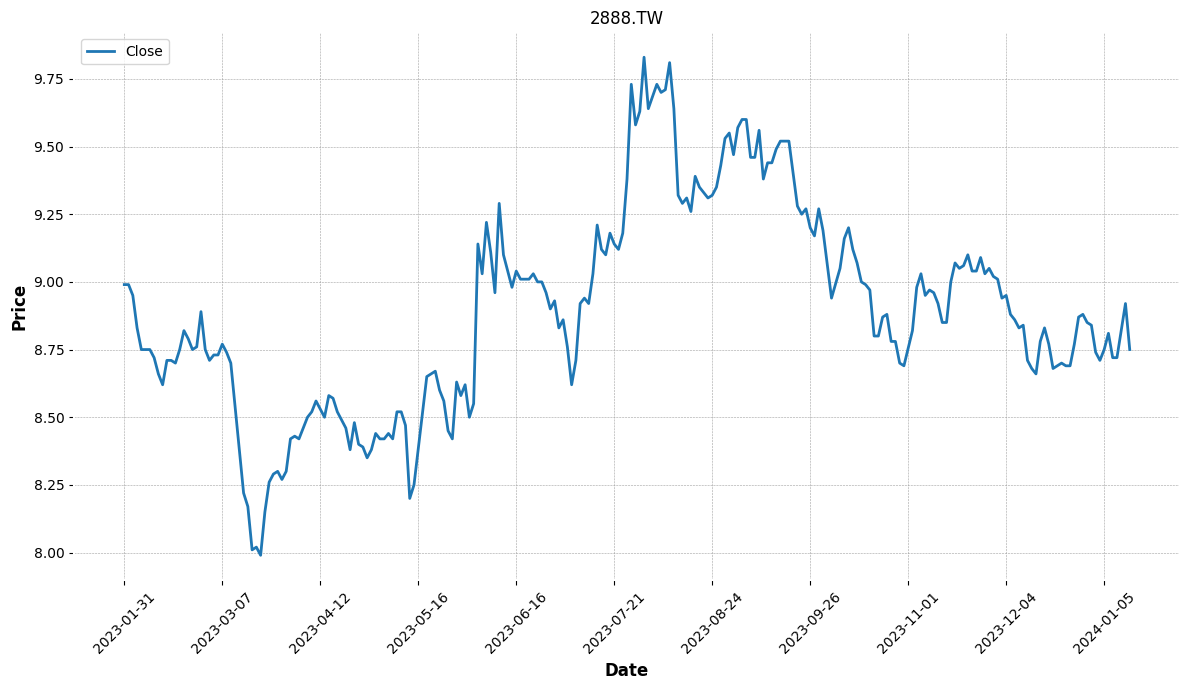

In [62]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

In [63]:
!pip install mplfinance

In [64]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')

# 過濾掉非數字列
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
kplot_df = kplot_df[numeric_columns]

# 檢查並確保所有數據都是 float
kplot_df = kplot_df.astype(float)
kplot_df['2023-8-01':'2023-09-18'].tail()

Price,Open,High,Low,Close,Volume
Ticker,2888.TW,2888.TW,2888.TW,2888.TW,2888.TW
Date,,,,,
2023-09-12 00:00:00+00:00,9.37,9.44,9.37,9.44,24363495.0
2023-09-13 00:00:00+00:00,9.45,9.48,9.41,9.44,15789503.0
2023-09-14 00:00:00+00:00,9.47,9.49,9.43,9.49,24445127.0
2023-09-15 00:00:00+00:00,9.50,9.52,9.47,9.52,48188380.0
2023-09-18 00:00:00+00:00,9.47,9.54,9.46,9.52,17976733.0


In [65]:
# kplot_df.fillna(0, inplace=True)  # 用 0 填補

In [66]:
kplot_df.columns
# 將 MultiIndex 轉換為單層索引
kplot_df.columns = kplot_df.columns.get_level_values(0)

# 檢查轉換後的欄位名稱
print(kplot_df.head())

Price                      Open  High   Low  Close      Volume
Date                                                          
2023-01-31 00:00:00+00:00  9.01  9.03  8.96   8.99  34797769.0
2023-02-01 00:00:00+00:00  8.98  9.01  8.95   8.99  28891288.0
2023-02-02 00:00:00+00:00  8.98  9.00  8.92   8.95  38724691.0
2023-02-03 00:00:00+00:00  8.94  8.95  8.83   8.83  36927888.0
2023-02-06 00:00:00+00:00  8.82  8.82  8.75   8.75  25005662.0


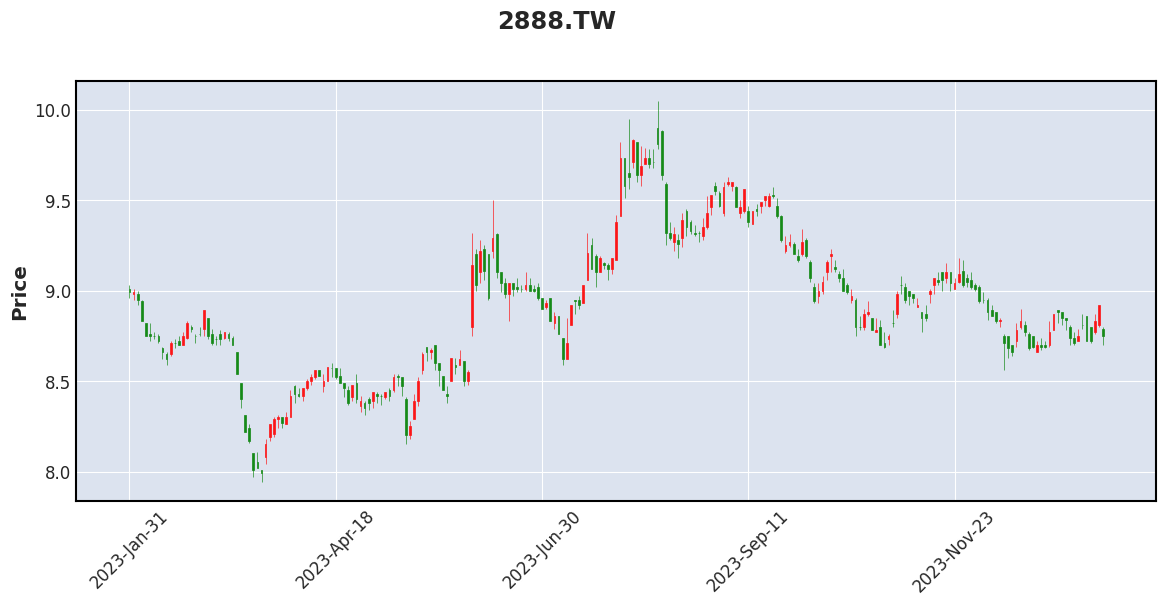

In [67]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

# 處理資料

In [68]:
# 資料準備
close_prices = df['Close'].values
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]


In [69]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import StandardScaler

In [70]:
# 標準化數據
scaler = StandardScaler()
train = scaler.fit_transform(train.reshape(-1, 1))
test = scaler.transform(test.reshape(-1, 1))

# 資料轉換成 PyTorch tensor
train_tensor = torch.tensor(train, dtype=torch.float32)
test_tensor = torch.tensor(test, dtype=torch.float32)

In [71]:
# 定義線性模型
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.fc1 = nn.Linear(1, 32)  # 單一輸入特徵、單一輸出特徵
        self.fc2 = nn.Linear(32,16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return (self.fc3(x))

model = LinearModel()

# lr=0.05
criterion = nn.MSELoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)  

# 訓練模型
epochs = 200  # 訓練迭代次數
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(train_tensor)
    loss = criterion(predictions, train_tensor)  # 使用訓練資料的真實值
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_predictions = model(test_tensor)

# 轉換回來
test_predictions = scaler.inverse_transform(test_predictions.numpy())


Epoch [10/200], Loss: 0.1939
Epoch [20/200], Loss: 0.0126
Epoch [30/200], Loss: 0.0068
Epoch [40/200], Loss: 0.0047
Epoch [50/200], Loss: 0.0035
Epoch [60/200], Loss: 0.0027
Epoch [70/200], Loss: 0.0022
Epoch [80/200], Loss: 0.0018
Epoch [90/200], Loss: 0.0014
Epoch [100/200], Loss: 0.0012
Epoch [110/200], Loss: 0.0010
Epoch [120/200], Loss: 0.0008
Epoch [130/200], Loss: 0.0007
Epoch [140/200], Loss: 0.0006
Epoch [150/200], Loss: 0.0005
Epoch [160/200], Loss: 0.0004
Epoch [170/200], Loss: 0.0004
Epoch [180/200], Loss: 0.0003
Epoch [190/200], Loss: 0.0003
Epoch [200/200], Loss: 0.0002


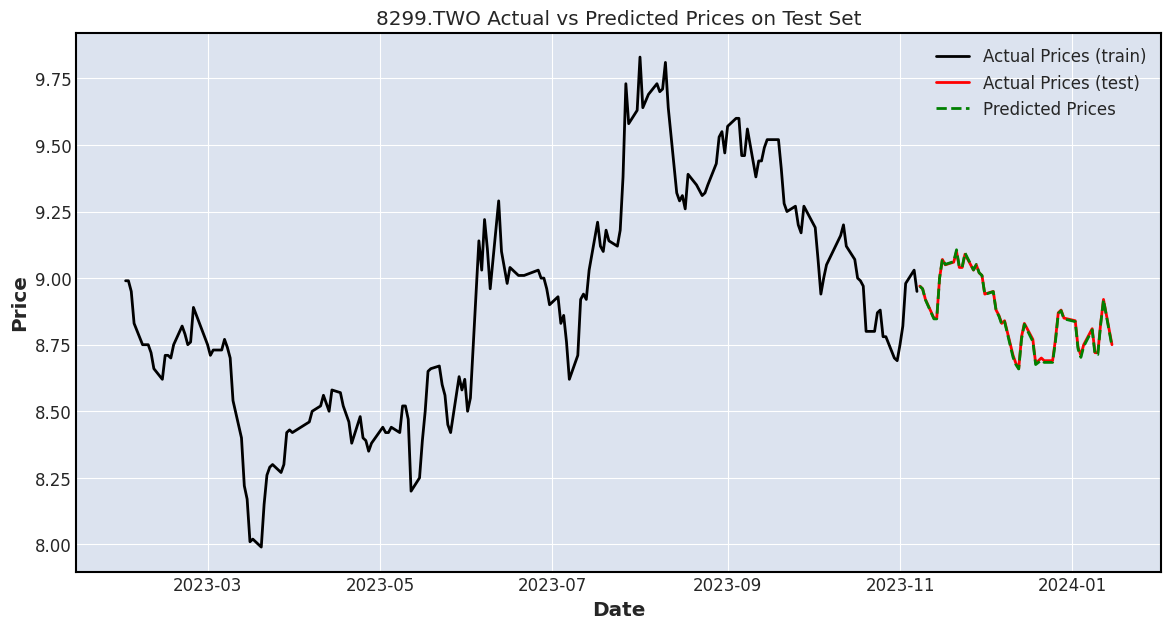

In [72]:
yhat = test_predictions  # 預測結果

# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
# 訓練集實際價格走勢
plt.plot(df['Date'][:train_size], df['Close'][:train_size], label='Actual Prices (train)', color='black', linewidth=2)
# 測試集實際價格走勢
plt.plot(df['Date'][train_size:], df['Close'][train_size:], label='Actual Prices (test)', color='red', linewidth=2)
# 測試集預測價格走勢
plt.plot(df['Date'][train_size:], yhat, label='Predicted Prices', linestyle='--', color='green')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('8299.TWO Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# 作業二
### 使用 TensorFlow 或 PyTorch 實作 CNN 捕捉 K 線趨勢，並預測股價漲跌（分類任務）。

### 使用更多資料

In [73]:
from sklearn.preprocessing import MinMaxScaler
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [74]:
# 輸入股票代號
stock_id = "2888.TW"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
#end = dt.date.today()
# output : 2024-09-30
end = dt.date(2024, 3, 30)
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=10000)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()
df.columns = df.columns.droplevel(1)
df

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
0,2002-02-20 00:00:00+00:00,7.834857,11.010353,11.010353,10.398671,10.857432,18479346
1,2002-02-21 00:00:00+00:00,7.580950,10.653536,10.959383,10.551592,10.959383,8344334900
2,2002-02-22 00:00:00+00:00,7.508407,10.551592,10.602567,9.939904,10.449640,23388971082
3,2002-02-25 00:00:00+00:00,7.254498,10.194775,10.449640,10.143800,10.449640,9969502
4,2002-02-26 00:00:00+00:00,7.254498,10.194775,10.296720,10.143800,10.296720,16001825
...,...,...,...,...,...,...,...
5480,2024-03-25 00:00:00+00:00,8.080000,8.080000,8.130000,8.080000,8.120000,19602524
5481,2024-03-26 00:00:00+00:00,8.080000,8.080000,8.160000,8.080000,8.100000,21477807
5482,2024-03-27 00:00:00+00:00,8.120000,8.120000,8.140000,8.090000,8.100000,19094116
5483,2024-03-28 00:00:00+00:00,8.060000,8.060000,8.140000,8.050000,8.130000,46037288


In [75]:
# 設置移動平均線的標籤
def create_labels(data, short_window=5, long_window=10):
    data = data.copy()  
    data['5_MA'] = data['Close'].rolling(window=short_window).mean()
    data['10_MA'] = data['Close'].rolling(window=long_window).mean()
    data['Label'] = np.where(data['5_MA'] > data['10_MA'], 1, 0)  # 標註「漲」或「跌」
    data = data.dropna()  # 移除含有 NaN 的行
    return data

# 確保在標準化之前移除所有 NaN 值
df = create_labels(df)
df = df.dropna(subset=['Open', 'High', 'Low', 'Close'])

# 將資料標準化並生成影像樣本
def preprocess_data(data, N):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close']])
    samples, labels = [], []
    
    for i in range(N, len(scaled_data)):
        samples.append(scaled_data[i-N:i, :])  # N 天的資料
        labels.append(data['Label'].values[i])  # 對應的標籤
    
    return np.array(samples), np.array(labels)

N = 20  # 每 20 天為一個樣本
samples, labels = preprocess_data(df, N)


In [76]:
class NewDataset(Dataset):
    def __init__(self, samples, labels):
        self.samples = samples
        self.labels = labels

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return torch.tensor(self.samples[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.long)

dataset = NewDataset(samples, labels)
train_size = int(0.9 * len(dataset))
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, len(dataset) - train_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [77]:
class CNN(nn.Module):
    def __init__(self, N):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(3, 1), stride=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3, 1), stride=1)
        # 根據輸入形狀計算 fc1 的輸入大小
        self.fc1 = nn.Linear(64 * (N - 4) * 4, 128) 
        self.fc2 = nn.Linear(128, 2)  # 二分類輸出 (漲或跌)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        #print(f'After conv1: {x.shape}')  # 印出 conv1 的輸出形狀
        
        x = torch.relu(self.conv2(x))
        #print(f'After conv2: {x.shape}')  # 印出 conv2 的輸出形狀
        
        x = x.view(x.size(0), -1)  # 展平
        #print(f'Flattened shape: {x.shape}')  # 印出展平後的形狀
        
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# 假設 N = 20
N = 20
model = CNN(N)

In [78]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)

# 訓練過程
epochs = 30
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs = inputs.unsqueeze(1)  # 添加 channel 維度 [batch_size, 1, N, 4]
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")


Epoch [1/30], Loss: 0.6947
Epoch [2/30], Loss: 0.6930
Epoch [3/30], Loss: 0.6875
Epoch [4/30], Loss: 0.6092
Epoch [5/30], Loss: 0.3959
Epoch [6/30], Loss: 0.2748
Epoch [7/30], Loss: 0.2470
Epoch [8/30], Loss: 0.2410
Epoch [9/30], Loss: 0.2316
Epoch [10/30], Loss: 0.2336
Epoch [11/30], Loss: 0.2265
Epoch [12/30], Loss: 0.2115
Epoch [13/30], Loss: 0.2065
Epoch [14/30], Loss: 0.1847
Epoch [15/30], Loss: 0.1957
Epoch [16/30], Loss: 0.1897
Epoch [17/30], Loss: 0.1946
Epoch [18/30], Loss: 0.1915
Epoch [19/30], Loss: 0.1912
Epoch [20/30], Loss: 0.1778
Epoch [21/30], Loss: 0.1752
Epoch [22/30], Loss: 0.1770
Epoch [23/30], Loss: 0.1812
Epoch [24/30], Loss: 0.1896
Epoch [25/30], Loss: 0.1860
Epoch [26/30], Loss: 0.1823
Epoch [27/30], Loss: 0.1645
Epoch [28/30], Loss: 0.1808
Epoch [29/30], Loss: 0.1707
Epoch [30/30], Loss: 0.1687


In [79]:
# 測試過程
model.eval()  
total_loss = 0
correct = 0
total = 0

with torch.no_grad():  
    for inputs, labels in test_loader:
        inputs = inputs.unsqueeze(1)  # 添加 channel 維度 [batch_size, 1, N, 4]
        outputs = model(inputs)
        loss = criterion(outputs, labels)  
        total_loss += loss.item()  
        
        # 計算準確度
        _, predicted = torch.max(outputs.data, 1)  # 獲取預測類別
        total += labels.size(0)  # 總樣本數
        correct += (predicted == labels).sum().item()  # 正確預測數

# 測試結果
avg_loss = total_loss / len(test_loader)
accuracy = correct / total
print(f'Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}')


Test Loss: 0.1464, Test Accuracy: 0.9560


In [80]:
test_data = inputs[0].unsqueeze(0)  # [1, C, H, W]

# 確保 test_image 的形狀是正確的
print(f"Test image shape: {test_data.shape}")  # 應該是 [1, 1, N, 4]

# 使用模型進行預測
model.eval()  
with torch.no_grad(): 
    output = model(test_data)

# 獲取預測結果
kdata, predicted = torch.max(output, 1)  # 獲取預測的類別



Test image shape: torch.Size([1, 1, 20, 4])


(20, 4)
Predicted: 1, Actual: 1


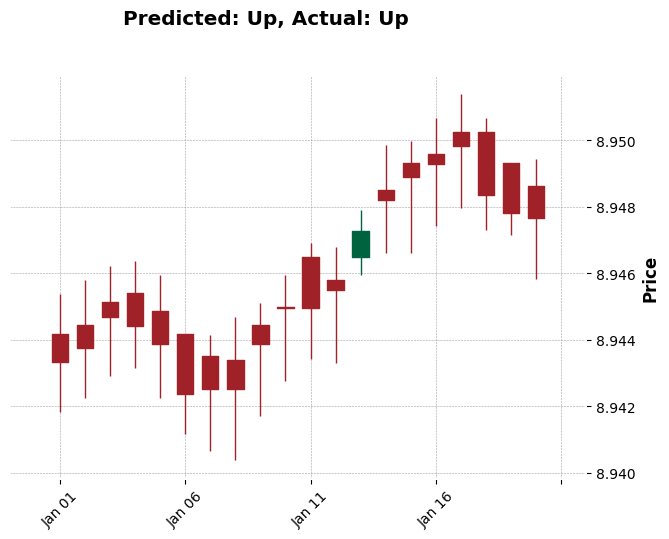

In [81]:
test_data_np = test_data.numpy().squeeze(0).squeeze(0)  # 去掉多餘的維度，變成 (20, 4)
print(test_data_np.shape)  # 應該是 (20, 4)
test_data = scaler.inverse_transform(test_data_np)


# 提取開盤價、最高價、最低價、收盤價
open_price = test_data[:, 0]
high_price = test_data[:, 1]
low_price = test_data[:, 2]
close_price = test_data[:, 3]

# 創建日期索引，這裡我們用簡單的整數索引代替實際日期
dates = pd.date_range(start='2023-01-01', periods=open_price.shape[0], freq='D')

# 創建 DataFrame
df = pd.DataFrame({
    'Open': open_price,
    'High': high_price,
    'Low': low_price,
    'Close': close_price
}, index=dates)


# 打印預測類別和實際標籤
print(f"Predicted: {predicted.item()}, Actual: {labels[0].item()}")
# 繪製 K 線圖
mpf.plot(df, type='candle', style='charles', title=f"Predicted: {'Up' if predicted.item() == 1 else 'Down'}, Actual: {'Up' if labels[0].item() == 1 else 'Down'}", ylabel='Price', volume=False)